In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# all columns are numerical (categorical columns have been converted)
df = pd.read_csv('df.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df = df.drop(columns=[
    'Late_delivery_risk'
], axis=1)

In [ ]:
df_obj = df.select_dtypes(include='object')
df_obj.drop(columns=['Delivery Status'], axis=1, inplace=True)

In [ ]:
#one hot encoder
def onehotencoder(col):
    
    ohe = OneHotEncoder()
    ohe_array = ohe.fit_transform((pd.DataFrame(col))).toarray()

    feature_labels = np.array(ohe.categories_).ravel()


    df_obj = pd.DataFrame(ohe_array, columns=feature_labels)
    
    return df_obj

In [ ]:
df_ohe = pd.DataFrame()
for c in df_obj.columns:
    one_hot = onehotencoder(df_obj[c])
    df_ohe = pd.concat([df_ohe, one_hot], axis=1) 

In [ ]:
df_cont_var = df.select_dtypes(exclude='object')

In [ ]:
df_ohe = pd.concat([df_cont_var, df_ohe], axis=1)

In [ ]:
df_ohe = pd.concat([df_ohe, df['Delivery Status'] ], axis=1)

In [ ]:
df=df_ohe

##### X and Y values

In [3]:
# y variable values set equal to label encode the dataframes column being used for y
le = LabelEncoder()
y = le.fit_transform(df['Delivery Status'])

In [4]:
# x variable
X = df.drop(columns=['Delivery Status'], axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X[:1000], y[:1000], train_size=.8, test_size=.2)

##### Create Pipeline

##### random forest

In [6]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

In [7]:
rf_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'rf', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'rf__bootstrap', 'rf__ccp_alpha', 'rf__class_weight', 'rf__criterion', 'rf__max_depth', 'rf__max_features', 'rf__max_leaf_nodes', 'rf__max_samples', 'rf__min_impurity_decrease', 'rf__min_impurity_split', 'rf__min_samples_leaf', 'rf__min_samples_split', 'rf__min_weight_fraction_leaf', 'rf__n_estimators', 'rf__n_jobs', 'rf__oob_score', 'rf__random_state', 'rf__verbose', 'rf__warm_start'])

In [8]:
rf_param_grid=[{
    'rf__criterion':['gini', 'entropy'],
    'rf__max_depth':[10,70],
    'rf__min_samples_split':[50,100],
    'rf__min_samples_leaf':[1,100],
}]

In [9]:
#rain
rf_rand_search = RandomizedSearchCV(rf_pipeline, rf_param_grid,)

rf_rand_search.fit(X_train, y_train)
rfc_pred_train = rf_rand_search.predict(X_train)

In [10]:
print(classification_report(y_train, rfc_pred_train, target_names=le.classes_))

                  precision    recall  f1-score   support

Advance shipping       0.69      0.77      0.73       224
   Late delivery       0.70      0.92      0.79       416
Shipping on time       1.00      0.03      0.05       160

        accuracy                           0.70       800
       macro avg       0.80      0.57      0.52       800
    weighted avg       0.76      0.70      0.63       800



In [11]:
print('Mean Absolute Error:', mean_absolute_error(y_train, rfc_pred_train))
print('Mean Squared Error:', mean_squared_error(y_train, rfc_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, rfc_pred_train)))

Mean Absolute Error: 0.35625
Mean Squared Error: 0.46375
Root Mean Squared Error: 0.6809919235938118


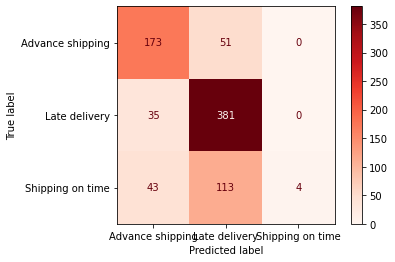

In [12]:
plot_confusion_matrix(rf_rand_search, X_train, y_train,
                      cmap=plt.cm.Reds)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

In [13]:
# test
rfc_pred_test = rf_rand_search.predict(X_test)

In [14]:
print(classification_report(y_test, rfc_pred_test, target_names=le.classes_))

                  precision    recall  f1-score   support

Advance shipping       0.54      0.57      0.55        51
   Late delivery       0.68      0.88      0.77       112
Shipping on time       0.00      0.00      0.00        37

        accuracy                           0.64       200
       macro avg       0.41      0.48      0.44       200
    weighted avg       0.52      0.64      0.57       200



In [15]:
print('Mean Absolute Error:', mean_absolute_error(y_test, rfc_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, rfc_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rfc_pred_test)))

Mean Absolute Error: 0.42
Mean Squared Error: 0.54
Root Mean Squared Error: 0.7348469228349535


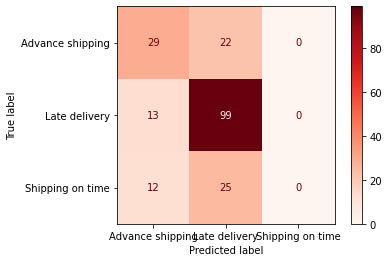

In [16]:
plot_confusion_matrix(rf_rand_search, X_test, y_test,
                      cmap=plt.cm.Reds)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

##### xgboost

In [17]:
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(eval_metric='mlogloss'))
])

In [18]:
xgb_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'xgb', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'xgb__objective', 'xgb__use_label_encoder', 'xgb__base_score', 'xgb__booster', 'xgb__colsample_bylevel', 'xgb__colsample_bynode', 'xgb__colsample_bytree', 'xgb__gamma', 'xgb__gpu_id', 'xgb__importance_type', 'xgb__interaction_constraints', 'xgb__learning_rate', 'xgb__max_delta_step', 'xgb__max_depth', 'xgb__min_child_weight', 'xgb__missing', 'xgb__monotone_constraints', 'xgb__n_estimators', 'xgb__n_jobs', 'xgb__num_parallel_tree', 'xgb__random_state', 'xgb__reg_alpha', 'xgb__reg_lambda', 'xgb__scale_pos_weight', 'xgb__subsample', 'xgb__tree_method', 'xgb__validate_parameters', 'xgb__verbosity', 'xgb__eval_metric'])

In [19]:
xgb_param_grid={
    'xgb__learning_rate': [0.1, 0.2, 0.3, 0.4],
    'xgb__gamma': [0, 1, 2, 3],
    'xgb__max_depth': [20,60],
    'xgb__min_child_weight': [1, 2],
    'xgb__subsample': [0.2, 0.5, 0.7, 0.9],
}

In [20]:
#train
xgb_rand_search = RandomizedSearchCV(xgb_pipeline, xgb_param_grid)

xgb_rand_search.fit(X_train, y_train)
xgb_pred_train = xgb_rand_search.predict(X_train)

In [21]:
print(classification_report(y_train, xgb_pred_train, target_names=le.classes_))

                  precision    recall  f1-score   support

Advance shipping       1.00      1.00      1.00       224
   Late delivery       1.00      1.00      1.00       416
Shipping on time       1.00      1.00      1.00       160

        accuracy                           1.00       800
       macro avg       1.00      1.00      1.00       800
    weighted avg       1.00      1.00      1.00       800



In [22]:
print('Mean Absolute Error:', mean_absolute_error(y_train, xgb_pred_train))
print('Mean Squared Error:', mean_squared_error(y_train, xgb_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, xgb_pred_train)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


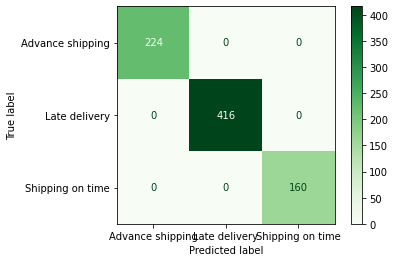

In [23]:
plot_confusion_matrix(xgb_rand_search, X_train, y_train,
                      cmap=plt.cm.Greens)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_)
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)



plt.show()

In [24]:
# test
xgb_pred_test = xgb_rand_search.predict(X_test)

In [25]:
print('Mean Absolute Error:', mean_absolute_error(y_test, xgb_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, xgb_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, xgb_pred_test)))

Mean Absolute Error: 0.28
Mean Squared Error: 0.38
Root Mean Squared Error: 0.6164414002968976


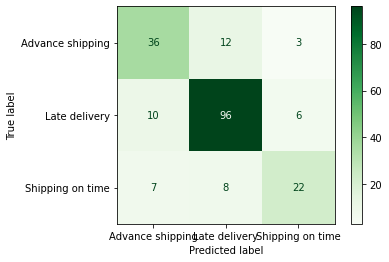

In [26]:
plot_confusion_matrix(xgb_rand_search, X_test, y_test,
                      cmap=plt.cm.Greens)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()